In [1]:
from utils.gmsh_function import *
from src.radiation_algorithm.radiation_algorithm import *
from utils.frequency_sweep import *

In [2]:
mesh_name = "strip_gmsh.msh"
save_mesh_folder = 'data/gmsh_files/'
radiate_strip_mat_gmsh = 'data/antennas_mesh/radiate_strip_gmsh.mat'
radiate_strip_msh_gmsh = save_mesh_folder + mesh_name

In [3]:

gmsh.initialize()
model_name  = "strip_antenna"
longueur = 20 / 1000
hauteur = 2
print(f"Longueur: {longueur} m, Hauteur: {hauteur} m")
feed_point = [0, 0, 0]

# Création du modèle
gmsh.model.add(model_name)
strip_antenna = gmsh.model.occ.addRectangle(-longueur / 2, -hauteur / 2, 0, longueur, hauteur)

apply_mesh_size(longueur*5)

gmsh.model.mesh.generate(2)
# run()

write(save_mesh_folder, mesh_name)

gmsh.finalize()

extract_msh_to_mat(radiate_strip_msh_gmsh, radiate_strip_mat_gmsh)

Longueur: 0.02 m, Hauteur: 2 m


radiate_strip_msh_gmsh = create_antenna_surface(create_strip, feed_point, feed_lenght, angle, meshSize, mesh_name, save_mesh_folder, high_current_points_list=np.array([3, 0]), iteration=0)

extract_radiation_msh_to_mat(radiate_strip_msh_gmsh, mesh_name, radiate_strip_mat_gmsh)

impedance, current_strip = radiation_algorithm(radiate_strip_mat_gmsh, 75e6, feed_point)


La valeur de l'impédance d'entrée de l'antenne radiate_strip_gmsh =  41.8956252 - 117.2384723i Ohm
Gap current of radiate_strip_gmsh = (0.0054058512714137965+0.01512744449195517j)
Gap voltage of radiate_strip_gmsh = (2+0j)
La valeur de feed_power  = 0.0054058512714137965

Simulation 1/301 | f = 60.00 MHz | S11 = -2.06 dB

La valeur de l'impédance d'entrée de l'antenne radiate_strip_gmsh =  42.1040328 - 116.1451434i Ohm
Gap current of radiate_strip_gmsh = (0.005517338243783067+0.015219730738103189j)
Gap voltage of radiate_strip_gmsh = (2+0j)
La valeur de feed_power  = 0.005517338243783067

Simulation 2/301 | f = 60.10 MHz | S11 = -2.10 dB

La valeur de l'impédance d'entrée de l'antenne radiate_strip_gmsh =  42.3134033 - 115.0528374i Ohm
Gap current of radiate_strip_gmsh = (0.005631432973671555+0.015312224761641142j)
Gap voltage of radiate_strip_gmsh = (2+0j)
La valeur de feed_power  = 0.005631432973671555

Simulation 3/301 | f = 60.20 MHz | S11 = -2.14 dB

La valeur de l'impédance d'en

Simulation 151/301 | f = 75.00 MHz | S11 = -8.22 dB

La valeur de l'impédance d'entrée de l'antenne radiate_strip_gmsh =  88.0323551 + 42.1786014i Ohm
Gap current of radiate_strip_gmsh = (0.018477248385288653-0.008852932459893508j)
Gap voltage of radiate_strip_gmsh = (2+0j)
La valeur de feed_power  = 0.018477248385288653

Simulation 152/301 | f = 75.10 MHz | S11 = -8.10 dB

La valeur de l'impédance d'entrée de l'antenne radiate_strip_gmsh =  88.4695904 + 43.2308174i Ohm
Gap current of radiate_strip_gmsh = (0.01824910700915169-0.008917457514843286j)
Gap voltage of radiate_strip_gmsh = (2+0j)
La valeur de feed_power  = 0.01824910700915169

Simulation 153/301 | f = 75.20 MHz | S11 = -7.98 dB

La valeur de l'impédance d'entrée de l'antenne radiate_strip_gmsh =  88.9091330 + 44.2833782i Ohm
Gap current of radiate_strip_gmsh = (0.01802361060369081-0.008977102093545818j)
Gap voltage of radiate_strip_gmsh = (2+0j)
La valeur de feed_power  = 0.01802361060369081

Simulation 154/301 | f = 75.30 M

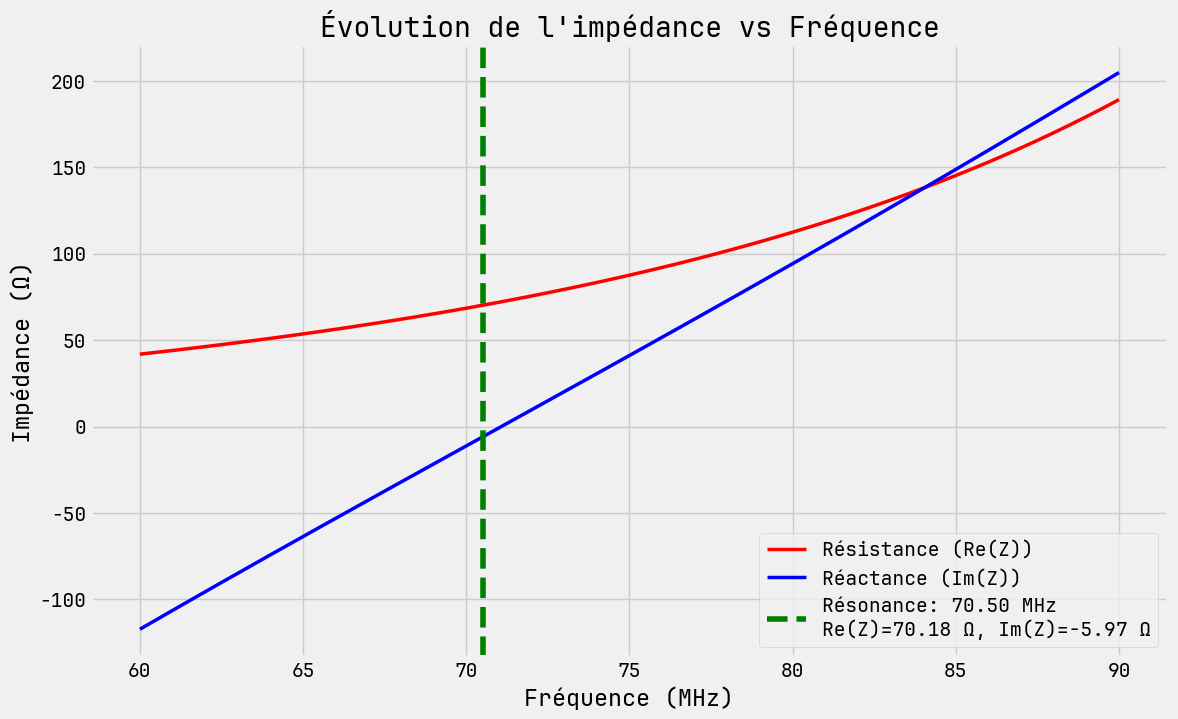


Résultats de simulation :
→ Fréquence de résonance = 70.50 MHz
→ Impédance à f_res      = 70.18-5.97j Ω


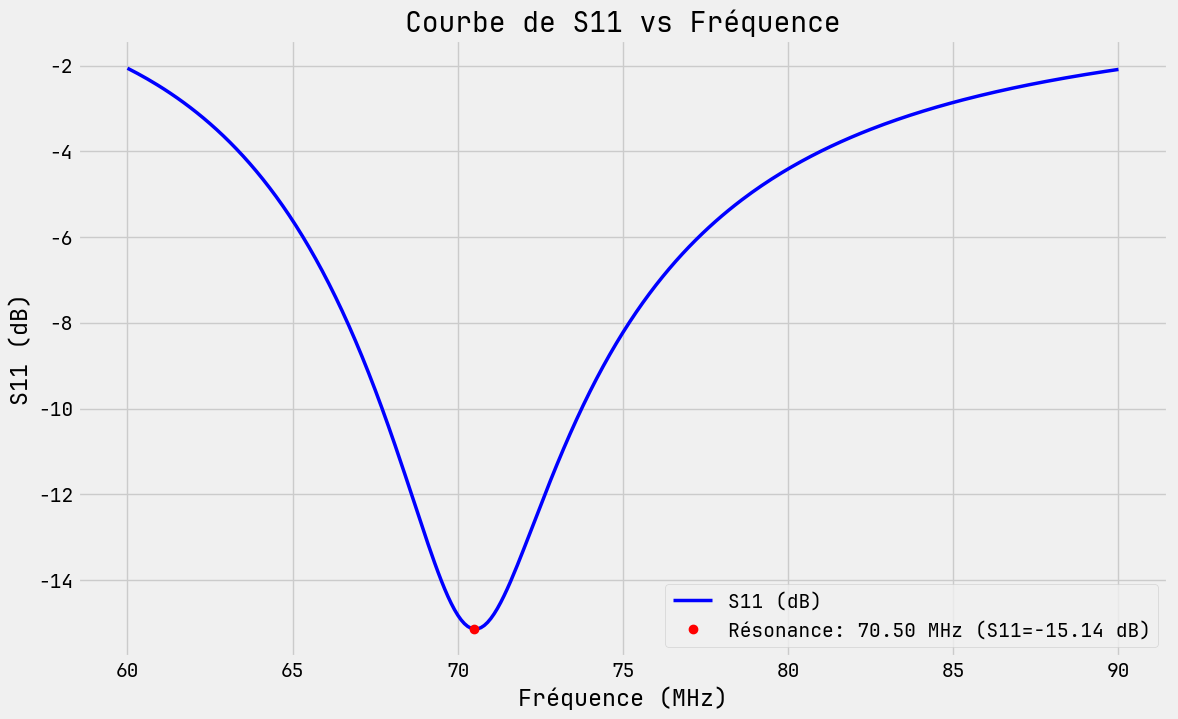

In [4]:
f_resonance, s11_db, R_res, X_res = frequency_sweep(radiate_strip_mat_gmsh, 60e6, 75e6, 90e6, feed_point)
plot_s11_curve(s11_db, 60e6, 90e6)

In [5]:
# Charger les données CST
cst_data_1 = np.loadtxt("data/plot_file/Plot_S11_strip.txt", skiprows=3)
cst_freq_mhz = cst_data_1[:, 0]  # fréquence déjà en MHz
cst_s11_db = cst_data_1[:, 1]

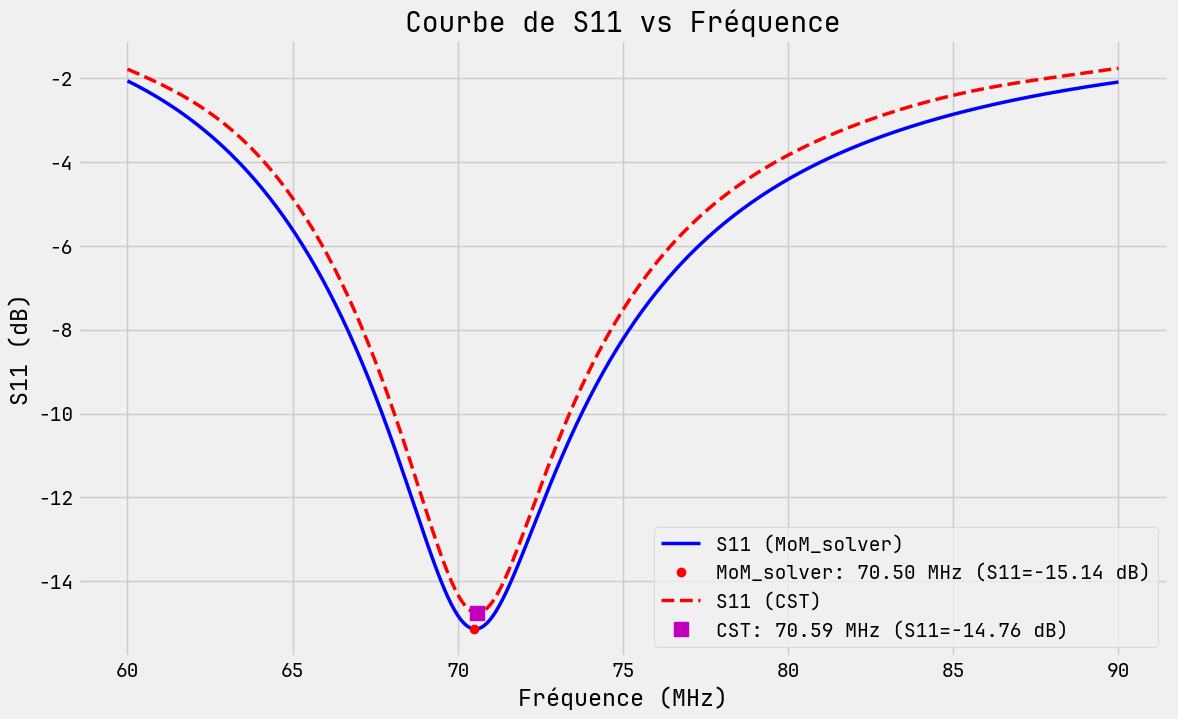

In [6]:
plot_s11_curve_CST_MoM(s11_db, 60e6, 90e6, cst_freq_mhz=cst_freq_mhz, cst_s11_db=cst_s11_db)